In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Replace invalid zeros with NaN
cols_with_zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Fill missing values with column means
df.fillna(df.mean(), inplace=True)

# Split features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# ------------------ 🧪 PREDICTION FUNCTION ------------------
def predict_diabetes():
    print("\nEnter Patient Info:")
    features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
    inputs = []

    for feature in features:
        val = float(input(f"{feature}: "))
        inputs.append(val)

    # Create DataFrame with feature names to avoid warning
    input_df = pd.DataFrame([inputs], columns=X.columns)

    # Scale the input
    input_scaled = scaler.transform(input_df)

    # Predict class and get probability of both classes
    prediction_proba = model.predict_proba(input_scaled)[0]
    prediction = np.argmax(prediction_proba)
    confidence = prediction_proba[prediction]

    # Show result
    print("\n🔍 Prediction Result:")
    if prediction == 1:
        print("⚠️ The person is **likely diabetic**.")
    else:
        print("✅ The person is **not diabetic**.")
    print(f"Confidence: {round(confidence * 100, 2)}%")

# Run prediction
predict_diabetes()



Enter Patient Info:


Pregnancies:  1
Glucose:  91
BloodPressure:  64
SkinThickness:  24
Insulin:  0
BMI:  29.2
DiabetesPedigreeFunction:  0.192
Age:  21



🔍 Prediction Result:
✅ The person is **not diabetic**.
Confidence: 98.5%



✅ Test Accuracy: 74.03%

📄 Classification Report:
              precision    recall  f1-score   support

Non-Diabetic       0.78      0.83      0.81       100
    Diabetic       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



C:\Users\ASUS\AppData\Local\Temp\ipykernel_6820\3908284020.py:25: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


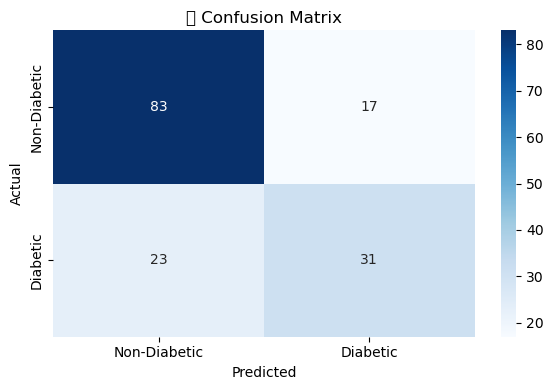

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Test Accuracy: {round(accuracy * 100, 2)}%")

# 2. Classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Diabetic", "Diabetic"]))

# 3. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Diabetic", "Diabetic"],
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("🧩 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [7]:
import joblib

# Save model and scaler
joblib.dump(model, "diabetes_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']